# Twin4Build: Basic Usage Example

Welcome to this tutorial on using the Twin4Build package! In this notebook, you'll learn how to:
1. Create a simple model with a schedule and a damper
2. Connect components in the model
3. Simulate the model
4. Visualize the results

Let's get started!

## 1. Setup
First, let's install and import the necessary packages:

In [1]:
# %pip install git+https://github.com/JBjoernskov/Twin4Build.git # Uncomment in google colab
import sys
sys.path.append(r"C:\Users\jabj\Documents\python\Twin4Build")
import twin4build as tb
import datetime
from dateutil import tz
# import twin4build.utils.plot.plot as plot

## Creating the Model

Now that we have our packages installed and imported, let's create a simple model.

In [2]:
# Create a new model
model = tb.Model(id="mymodel")
print(model)

+-----------------------------------------------------------------------------------------------------------------+
|                                          Model overview    id: mymodel                                          |
+---------------------------------------------+-------------------------------------------------------------------+
|  Number of components in simulation model:  |                                 0                                 |
+---------------------------------------------+-------------------------------------------------------------------+
| Number of connections in simulation model:  |                                 0                                 |
+---------------------------------------------+-------------------------------------------------------------------+
|              Model directory:               | C:\Users\jabj\AppData\Local\Temp\1\generated_files\models\mymodel |
+---------------------------------------------+-------------------------

C:\Users\jabj\Documents\python\Twin4Build\twin4build\utils\mkdir_in_root.py:5: MainPathNotFound: Could not determine main module path, using temp dir: C:\Users\jabj\AppData\Local\Temp\1
  current_dir = get_main_dir()


### Instantiating Components
As shown by the printout, the model is currently empty.<br>
Let's instantiate two components: a schedule and a damper.<br>
The inputs and outputs of the components are shown in the printout.<br>
Note that any class in the Twin4Build package ending with "System" can be used as a component.<br>
E.g.:


In [3]:
tb.ScheduleSystem
tb.AirToAirHeatRecoverySystem
tb.FanSystem

twin4build.systems.fan.fan_system.FanSystem

In [4]:
waterflow_schedule = tb.ScheduleSystem(
    weekDayRulesetDict = {
        "ruleset_default_value": 0,
        "ruleset_start_minute": [0,0],
        "ruleset_end_minute": [0,0],
        "ruleset_start_hour": [8, 19],
        "ruleset_end_hour": [16, 20],
        "ruleset_value": [2000/4180/(60-30), 2000/4180/(60-30)]
    },
    id="Waterflow schedule"
)
watertemperature_schedule = tb.ScheduleSystem(
    weekDayRulesetDict = {
        "ruleset_default_value": 60,
        "ruleset_start_minute": [],
        "ruleset_end_minute": [],
        "ruleset_start_hour": [],
        "ruleset_end_hour": [],
        "ruleset_value": []
    },
    id="Water temperature schedule"
)
indoortemperature_schedule = tb.ScheduleSystem(
    weekDayRulesetDict = {
        "ruleset_default_value": 21,
        "ruleset_start_minute": [],
        "ruleset_end_minute": [],
        "ruleset_start_hour": [],
        "ruleset_end_hour": [],
        "ruleset_value": []
    },
    id="Indoor temperature schedule"
)

space_heater = tb.SpaceHeaterSystem(
    Q_flow_nominal_sh=2000,
    T_a_nominal_sh=60,
    T_b_nominal_sh=30,
    TAir_nominal_sh=21,
    thermalMassHeatCapacity=1e+5,
    nelements = 10,
    id="sh"
)


### Connecting Components

Now that we have our components, let's connect them in the model.

In [5]:
# Connect the schedule's output to the damper's input
model.add_connection(waterflow_schedule, space_heater, "scheduleValue", "waterFlowRate")
model.add_connection(watertemperature_schedule, space_heater, "scheduleValue", "supplyWaterTemperature")
model.add_connection(indoortemperature_schedule, space_heater, "scheduleValue", "indoorTemperature")


2025-05-01:09:00:34,933 WARNING [term.py:287] http://simulation.org/Waterflow schedule does not look like a valid URI, trying to serialize this will break.
2025-05-01:09:00:34,933 WARNING [term.py:287] http://simulation.org/Water temperature schedule does not look like a valid URI, trying to serialize this will break.
2025-05-01:09:00:34,933 WARNING [term.py:287] http://simulation.org/Indoor temperature schedule does not look like a valid URI, trying to serialize this will break.


### Loading Model
Before we can simulate the model, we need to load it.<br>
This performs some internal operations and checks to prepare the model and ensure that the model is valid.

In [6]:
model.load()


Loading model...[OK]
   |___Drawing simulation model...

2025-05-01:09:00:35,963 WARNING [term.py:287] http://simulation.org/Indoor temperature schedule does not look like a valid URI, trying to serialize this will break.
2025-05-01:09:00:35,966 WARNING [term.py:287] http://simulation.org/Indoor temperature schedule does not look like a valid URI, trying to serialize this will break.
2025-05-01:09:00:35,980 WARNING [term.py:287] http://simulation.org/Water temperature schedule does not look like a valid URI, trying to serialize this will break.
2025-05-01:09:00:35,982 WARNING [term.py:287] http://simulation.org/Water temperature schedule does not look like a valid URI, trying to serialize this will break.
2025-05-01:09:00:35,987 WARNING [term.py:287] http://simulation.org/Waterflow schedule does not look like a valid URI, trying to serialize this will break.
2025-05-01:09:00:35,988 WARNING [term.py:287] http://simulation.org/Waterflow schedule does not look like a valid URI, trying to serialize this will break.



Loading model...[OK]
   |___Removing cycles...[OK]
   |___Determining execution order...[OK]
   |___Loading parameters...[OK]
   |___Validating model...[OK]
   |   |
   |
   |___Validated for Simulator...OK
   |___Validated for Estimator...OK
   |___Validated for Evaluator...OK
   |___Validated for Monitor...OK
   |___

+----------------------------------------------------------------+
|         Model overview    id: mymodel_simulation_model         |
+--------------------------------------------+-------------------+
| Number of components in simulation model:  |         4         |
+--------------------------------------------+-------------------+
|   Number of edges in simulation model:     |         3         |
+--------------------------------------------+-------------------+
|                                            |                   |
|                                            |                   |
+--------------------------------------------+-------------------+
|      

### Visualizing the Model (not required)
We can visualize the model to see the components and connections.<br>
This is not required, but it can be helpful for debugging and for building the model.<br>
The nodes in the graph represent components, and the edges represent connections between components as defined earlier.

In [7]:
# import matplotlib.pyplot as plt
# import os
# system_graph = os.path.join(model.graph_path, "system_graph.png")
# image = plt.imread(system_graph)
# plt.figure(figsize=(12,12))
# plt.imshow(image)
# plt.axis('off')
# plt.show()

## 2. Simulating the Model

Now that our model is set up, let's simulate it for a 2-day period.

In [8]:
# Set up the simulator and simulation parameters
simulator = tb.Simulator()
stepSize = 60  # Seconds
startTime = datetime.datetime(year=2024, month=1, day=10, hour=0, minute=0, second=0, tzinfo=tz.gettz("Europe/Copenhagen"))
endTime = datetime.datetime(year=2024, month=1, day=12, hour=0, minute=0, second=0, tzinfo=tz.gettz("Europe/Copenhagen"))

# Simulate the model
simulator.simulate(model,
                    stepSize=stepSize,
                    startTime=startTime,
                    endTime=endTime)


(array([98.47603542]), {'nfev': 12, 'fjac': array([[-1.]]), 'r': array([8.86900079]), 'qtf': array([-2.07969379e-07]), 'fvec': array([-2.50111043e-12])}, 1, 'The solution converged.')


100%|██████████| 2880/2880 [00:19<00:00, 148.57it/s]


## Visualizing the Results

Finally, let's visualize the results of our simulation.
We can use the general plot_component function to plot the results of the damper.


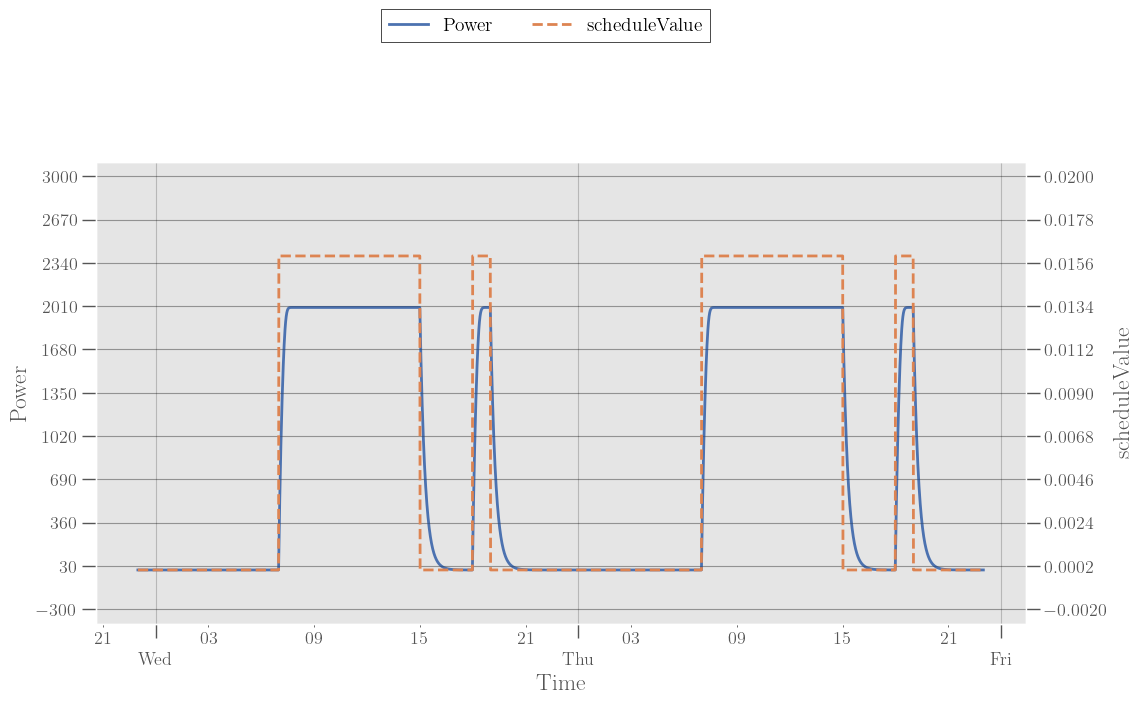

(<Figure size 1200x600 with 2 Axes>,
 [<Axes: xlabel='Time', ylabel='Power'>, <Axes: ylabel='scheduleValue'>])

In [9]:
tb.plot.plot_component(simulator,
                    components_1axis=[("sh", "Power", "output")], 
                    components_2axis=[("Waterflow schedule", "scheduleValue", "output")],
                    # ylabel_1axis="Air flow rate", #Optional
                    # ylabel_2axis="Damper position", #Optional
                    show=True,
                    nticks=11)


## Conclusion

Congratulations! You've successfully created a simple Twin4Build model, simulated it, and visualized the results. 

In this tutorial, you learned how to:
1. Create a model and add components (schedule and damper)
2. Connect components in the model
3. Set up and run a simulation
4. Visualize the simulation results

Next steps:
- Try adding more components to create more complex models
- Experiment with different schedules and parameter values
- Explore other visualization options in the `plot` module

For more advanced usage and detailed documentation, please refer to the Twin4Build documentation.